# Dimond Price Prediction
---

**The goal of this notebook is to conduct a comperhensive explorative data analysis (EDA) on the dataset.**

**Dataset link**: https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

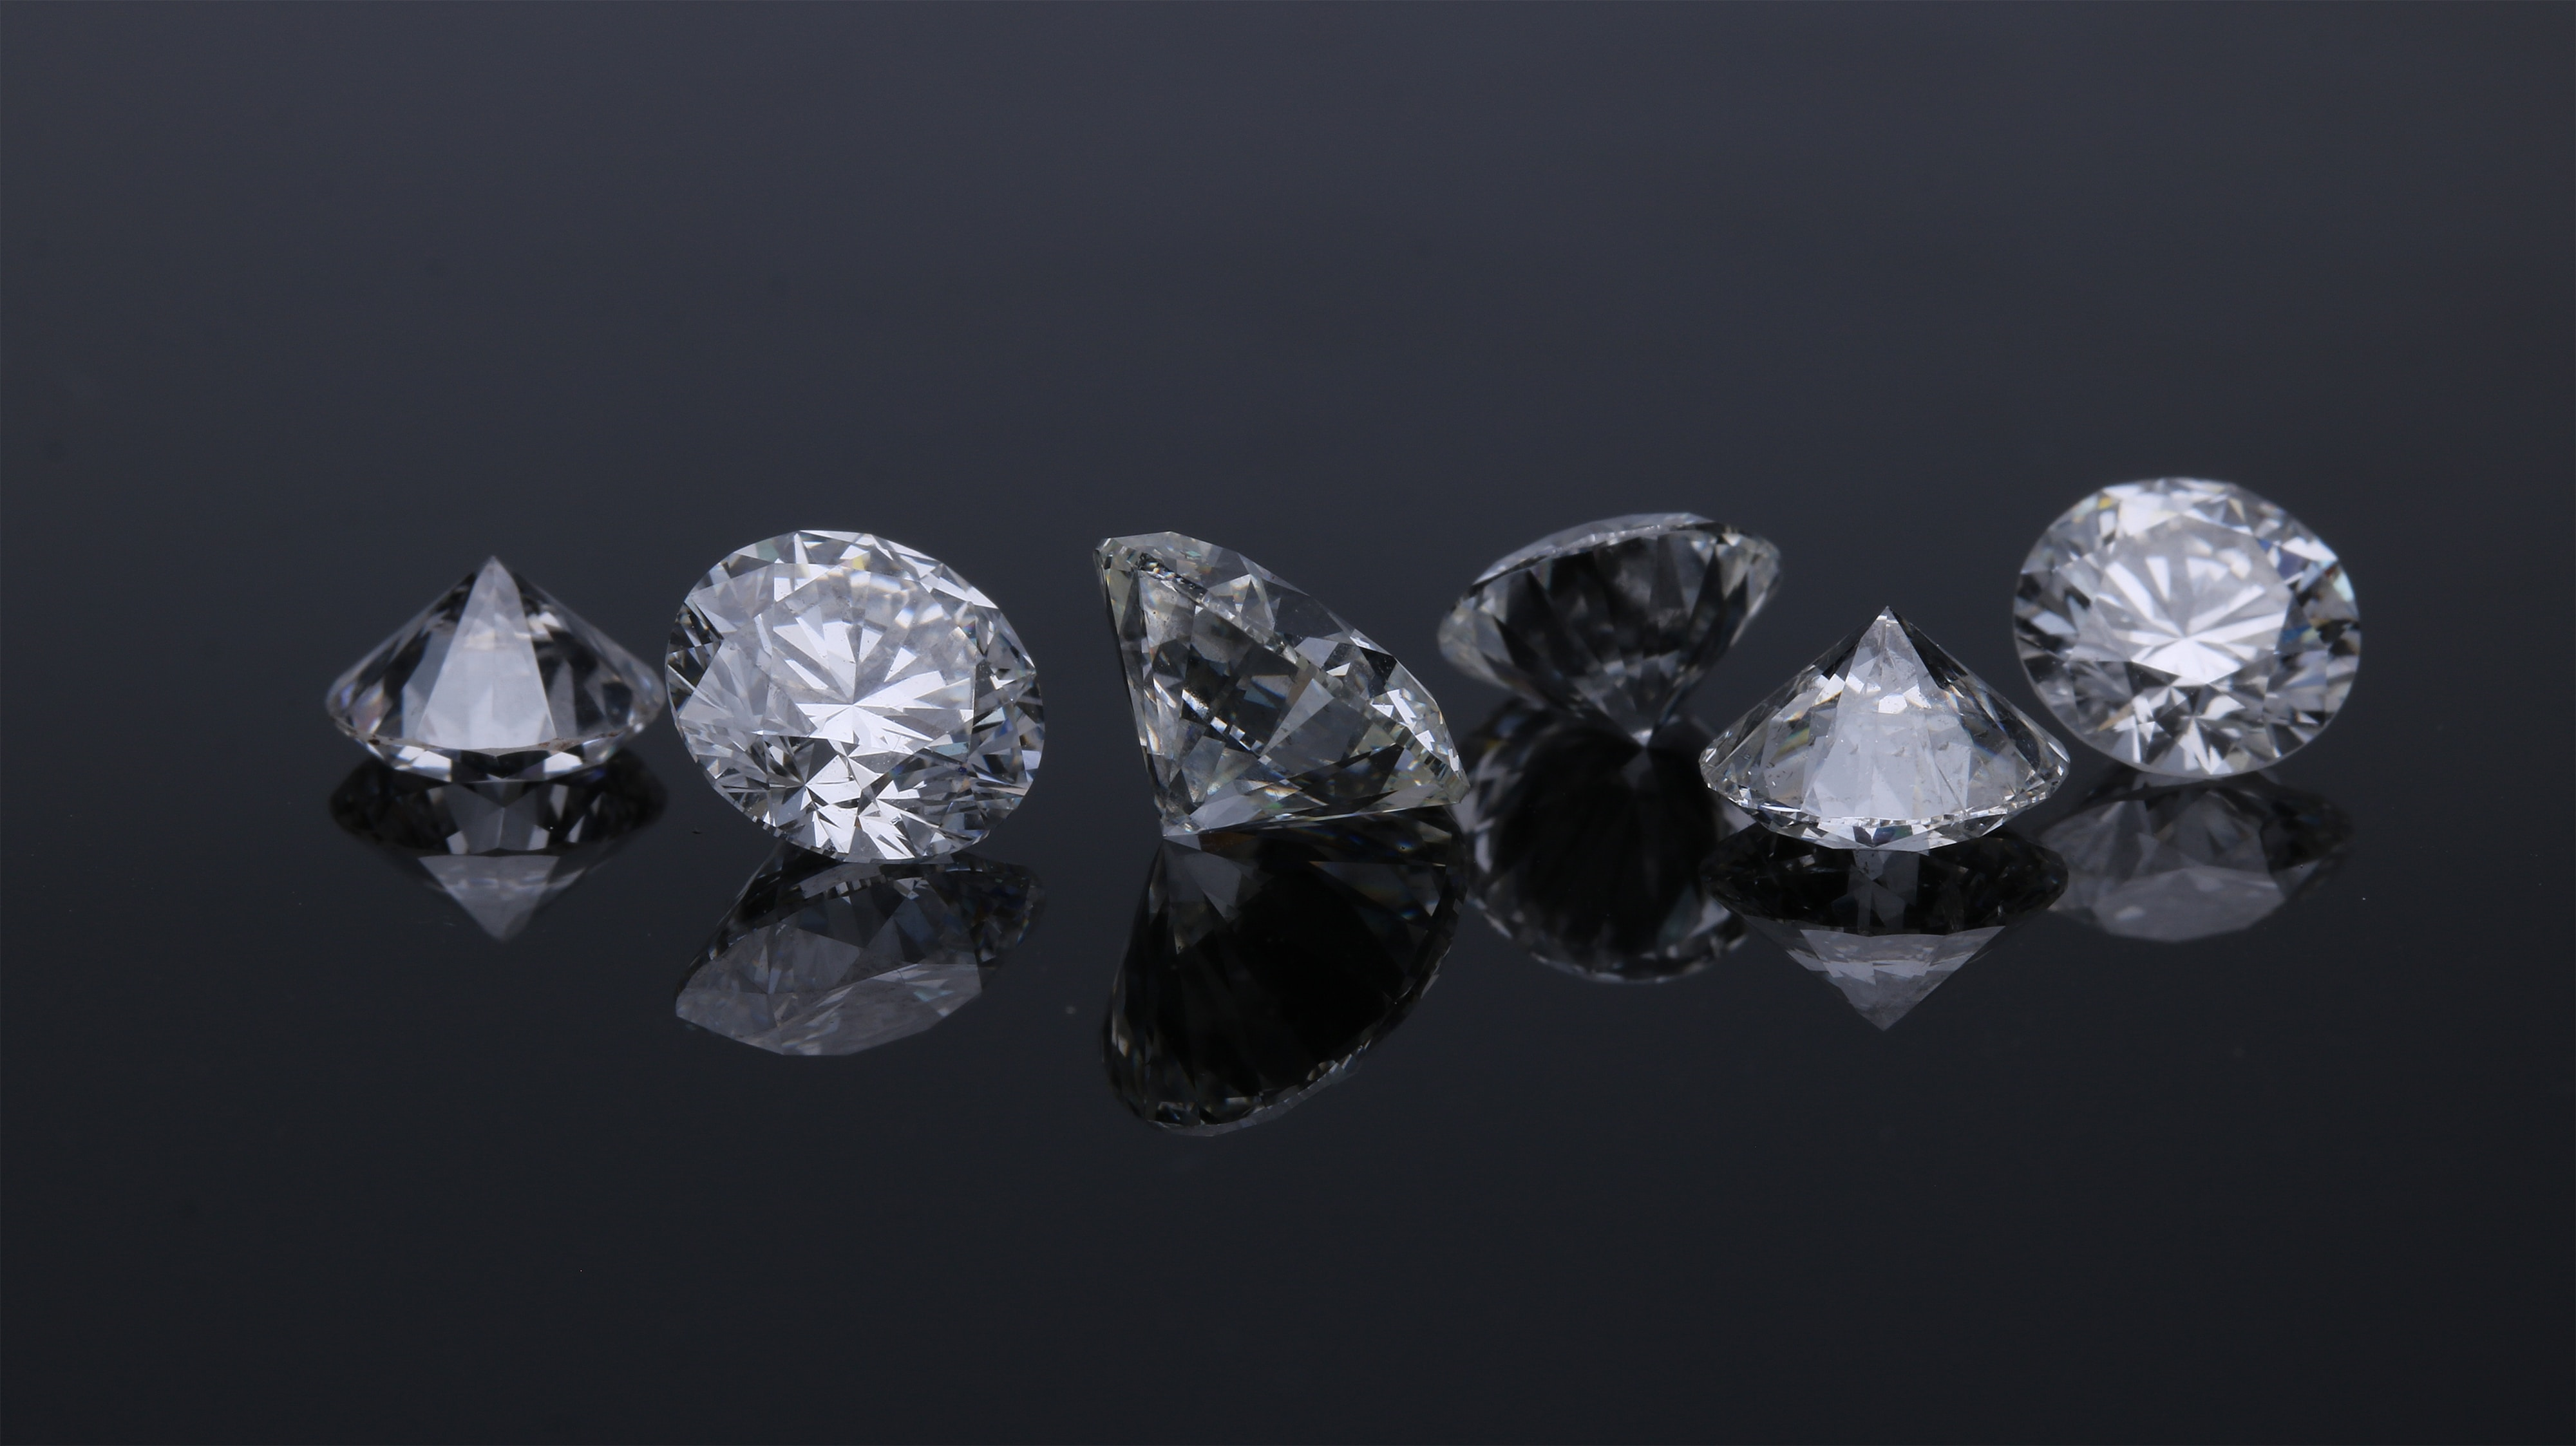

Photo by <a href="https://unsplash.com/@edgardo1987?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Edgar Soto</a> on <a href="https://unsplash.com/photos/gb0BZGae1Nk?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

---


### Data Description

**There are 10 independent variables:**
1. `id`: Identification column.
2. `carat`: Carat weight of the cubic zirconia.
3. `cut`: Describe the cut quality of the cubic zirconia. 

    Quality in increasing order: Fair, Good, Very Good, Premium, Ideal.
4. `color`: Colour of the cubic zirconia, with D being the best and J the worst.
5. `clarity`: Clarity refers to the absence of the Inclusions and Blemishes. 

    (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 
6. `depth`: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
7. `table`: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
8. `X`: Length of the cubic zirconia in mm.
9. `Y`: Width of the cubic zirconia in mm.
10. `Z`: Height of the cubic zirconia in mm.

**Target variable:**

**`price`**: Price of the Diamond.

---

### Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting up some styles on seaborn plots
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

### Reading the data from file and saving to the dataframe

In [2]:
##Data ingestions
df = pd.read_csv("data/gemstone.csv")
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False).style.background_gradient(cmap='YlOrBr').bar(subset=["mean",], color='green').bar(subset=["max"], color='#BB0000')

In [4]:
#missing values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**No missing values is present in the dataset.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
#lets drop the id column
df = df.drop(labels=["id"], axis = 1)
df.head()

carat        cut color clarity  depth  table    x    y    z  price
0   1.52    Premium     F     VS2  62.20  58.00 7.27 7.33 4.55  13619
1   2.03  Very Good     J     SI2  62.00  58.00 8.06 8.12 5.05  13387
2   0.70      Ideal     G     VS1  61.20  57.00 5.69 5.73 3.50   2772
3   0.32      Ideal     G     VS1  61.60  56.00 4.38 4.41 2.71    666
4   1.70    Premium     G     VS2  62.60  59.00 7.65 7.61 4.77  14453

In [7]:
#Check if any records are duplicated
df.duplicated().sum()

0

**There are no duplicate records in the dataset**

In [8]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [9]:
df[categorical_columns].describe()

cut   color clarity
count   193573  193573  193573
unique       5       7       8
top      Ideal       G     SI1
freq     92454   44391   53272

In [10]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [11]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [12]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

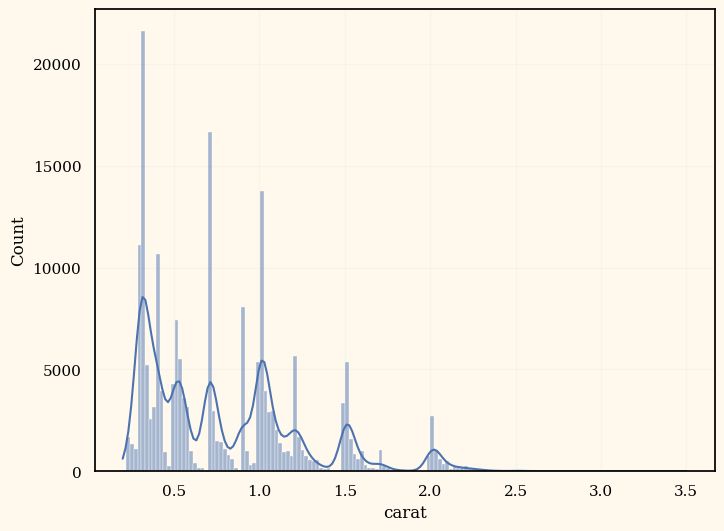

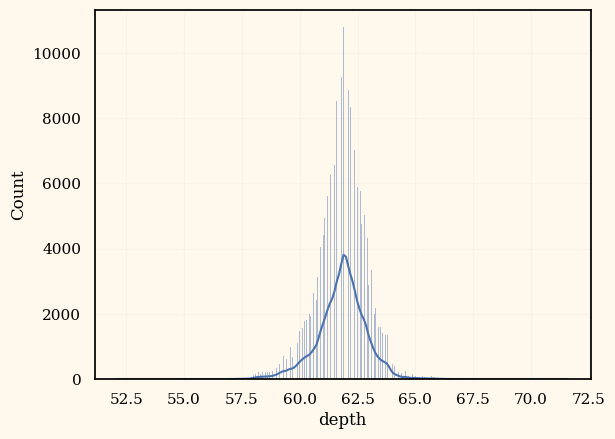

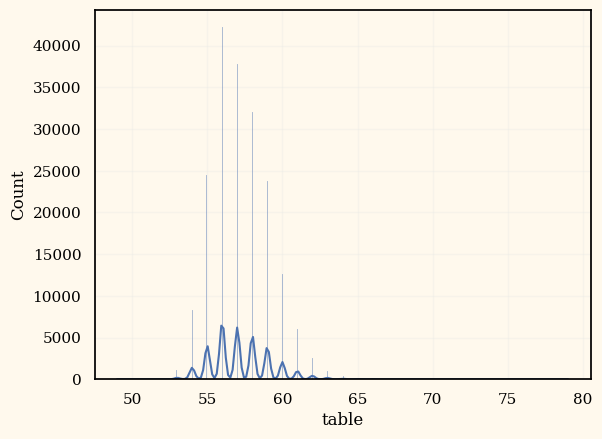

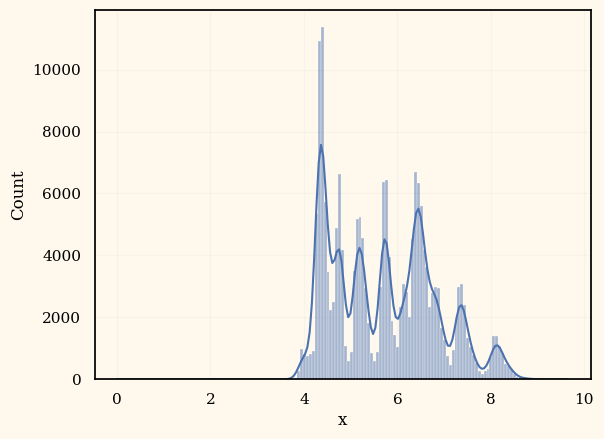

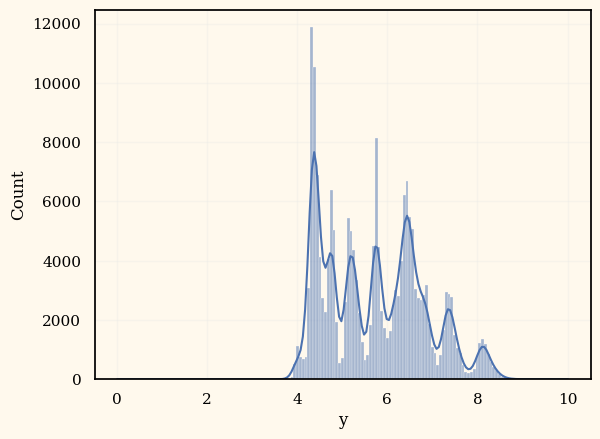

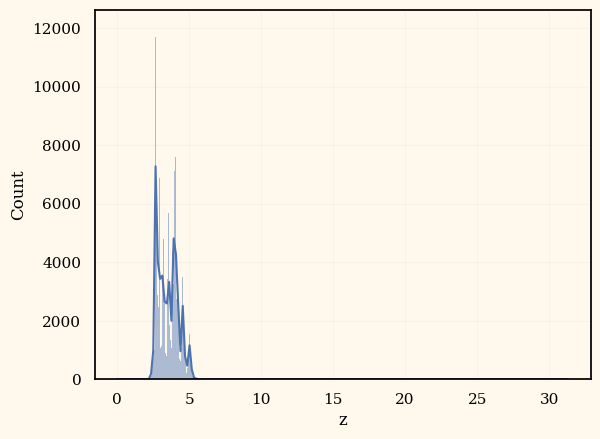

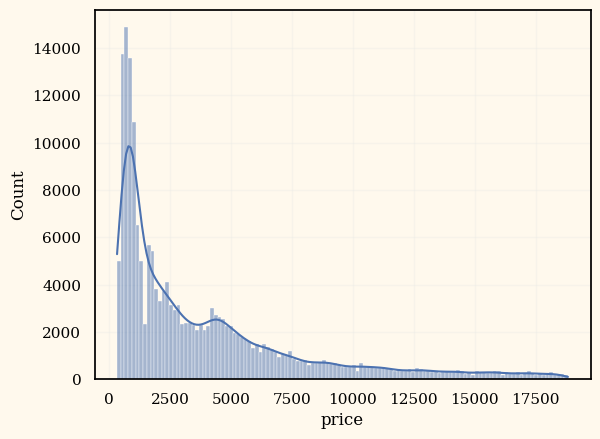

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [14]:
## Assignment Do the same for categorical data

In [15]:
## correlation
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Premium'